In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
pca_faces, _ = dr_datasets.get_faces_pca()

Running PCA for 61 components


In [3]:
pca_faces.shape[1]

61

In [4]:
reload(common)
n = pca_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(pca_faces, n)

For n_clusters = 2 average silhouette_score: 0.07152411444292621 time taken: 0.2756764888763428s
For n_clusters = 3 average silhouette_score: 0.05702478391195598 time taken: 0.23582029342651367s
For n_clusters = 4 average silhouette_score: 0.0449517493715976 time taken: 0.21323943138122559s
For n_clusters = 5 average silhouette_score: 0.03513150949251342 time taken: 0.27675437927246094s
For n_clusters = 6 average silhouette_score: 0.03175534261028607 time taken: 0.26255369186401367s
For n_clusters = 7 average silhouette_score: 0.031536234271289966 time taken: 0.46802473068237305s
For n_clusters = 8 average silhouette_score: 0.030543403647382346 time taken: 0.370316743850708s
For n_clusters = 9 average silhouette_score: 0.02473505726126502 time taken: 0.33278465270996094s
For n_clusters = 10 average silhouette_score: 0.02529391637233443 time taken: 0.3315157890319824s
For n_clusters = 11 average silhouette_score: 0.027238814731907448 time taken: 0.35475778579711914s
For n_clusters = 12 

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


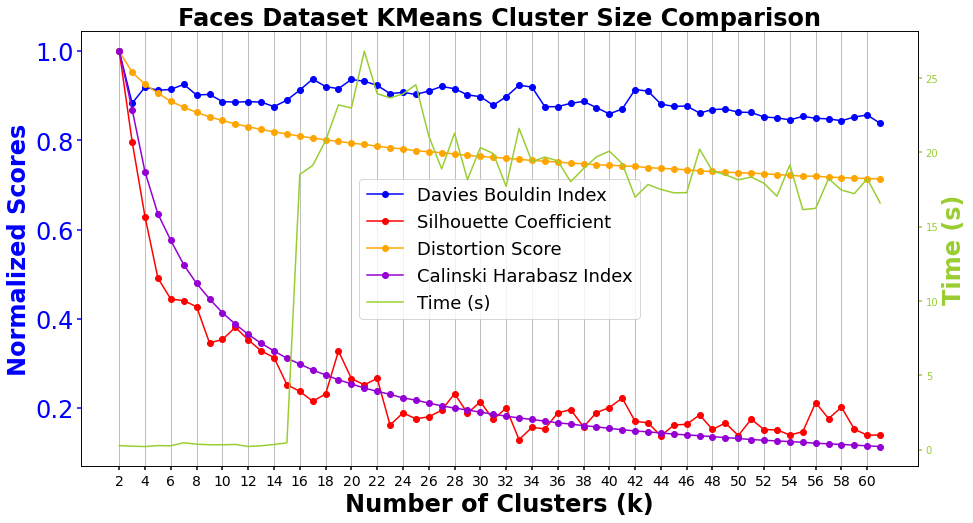

In [5]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


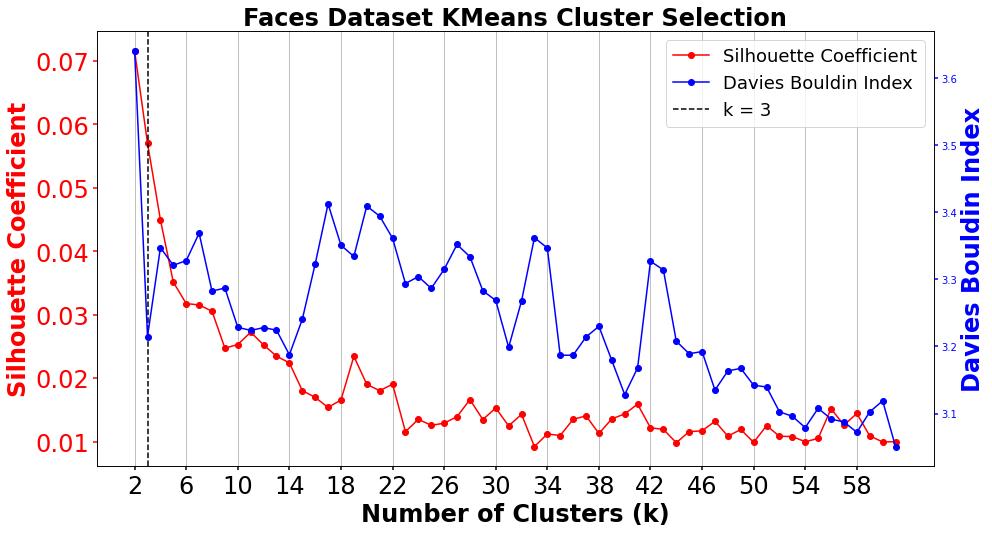

In [6]:
reload(common)
best_k = 3
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 3 average silhouette_score: 0.05702478391195598 time taken: 0.17176246643066406s


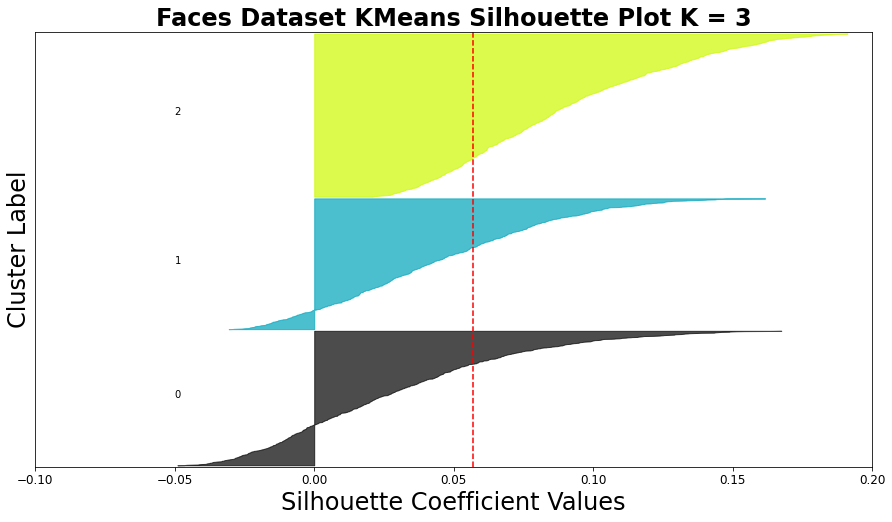

In [7]:
reload(common)
common.plot_silhouette_kmeans(pca_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [19]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(pca_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
pca_faces_km = pd.DataFrame(pca_faces.copy())
pca_faces_km['km_labels'] = km.labels_
pca_faces_km['sex'] = y_train_faces['sex']
pca_faces_km['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(pca_faces, km.labels_)))

Time Taken 0.26715517044067383 s
homogeneity_score sex:  0.00026566891399613555
homogeneity_score race:  0.0015219774074128605
Silhouette Score: 0.0449517493715976


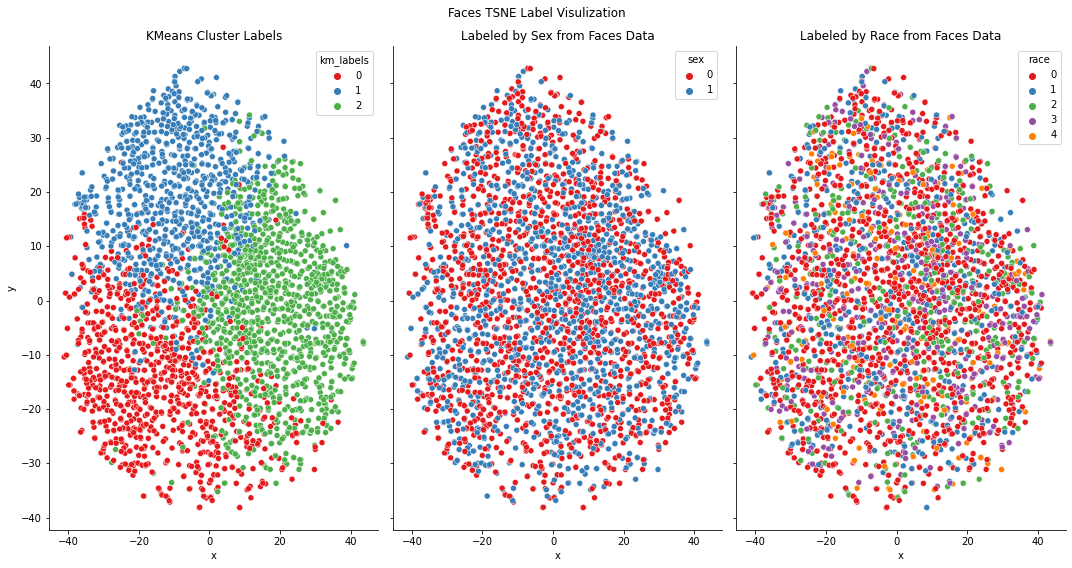

In [9]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

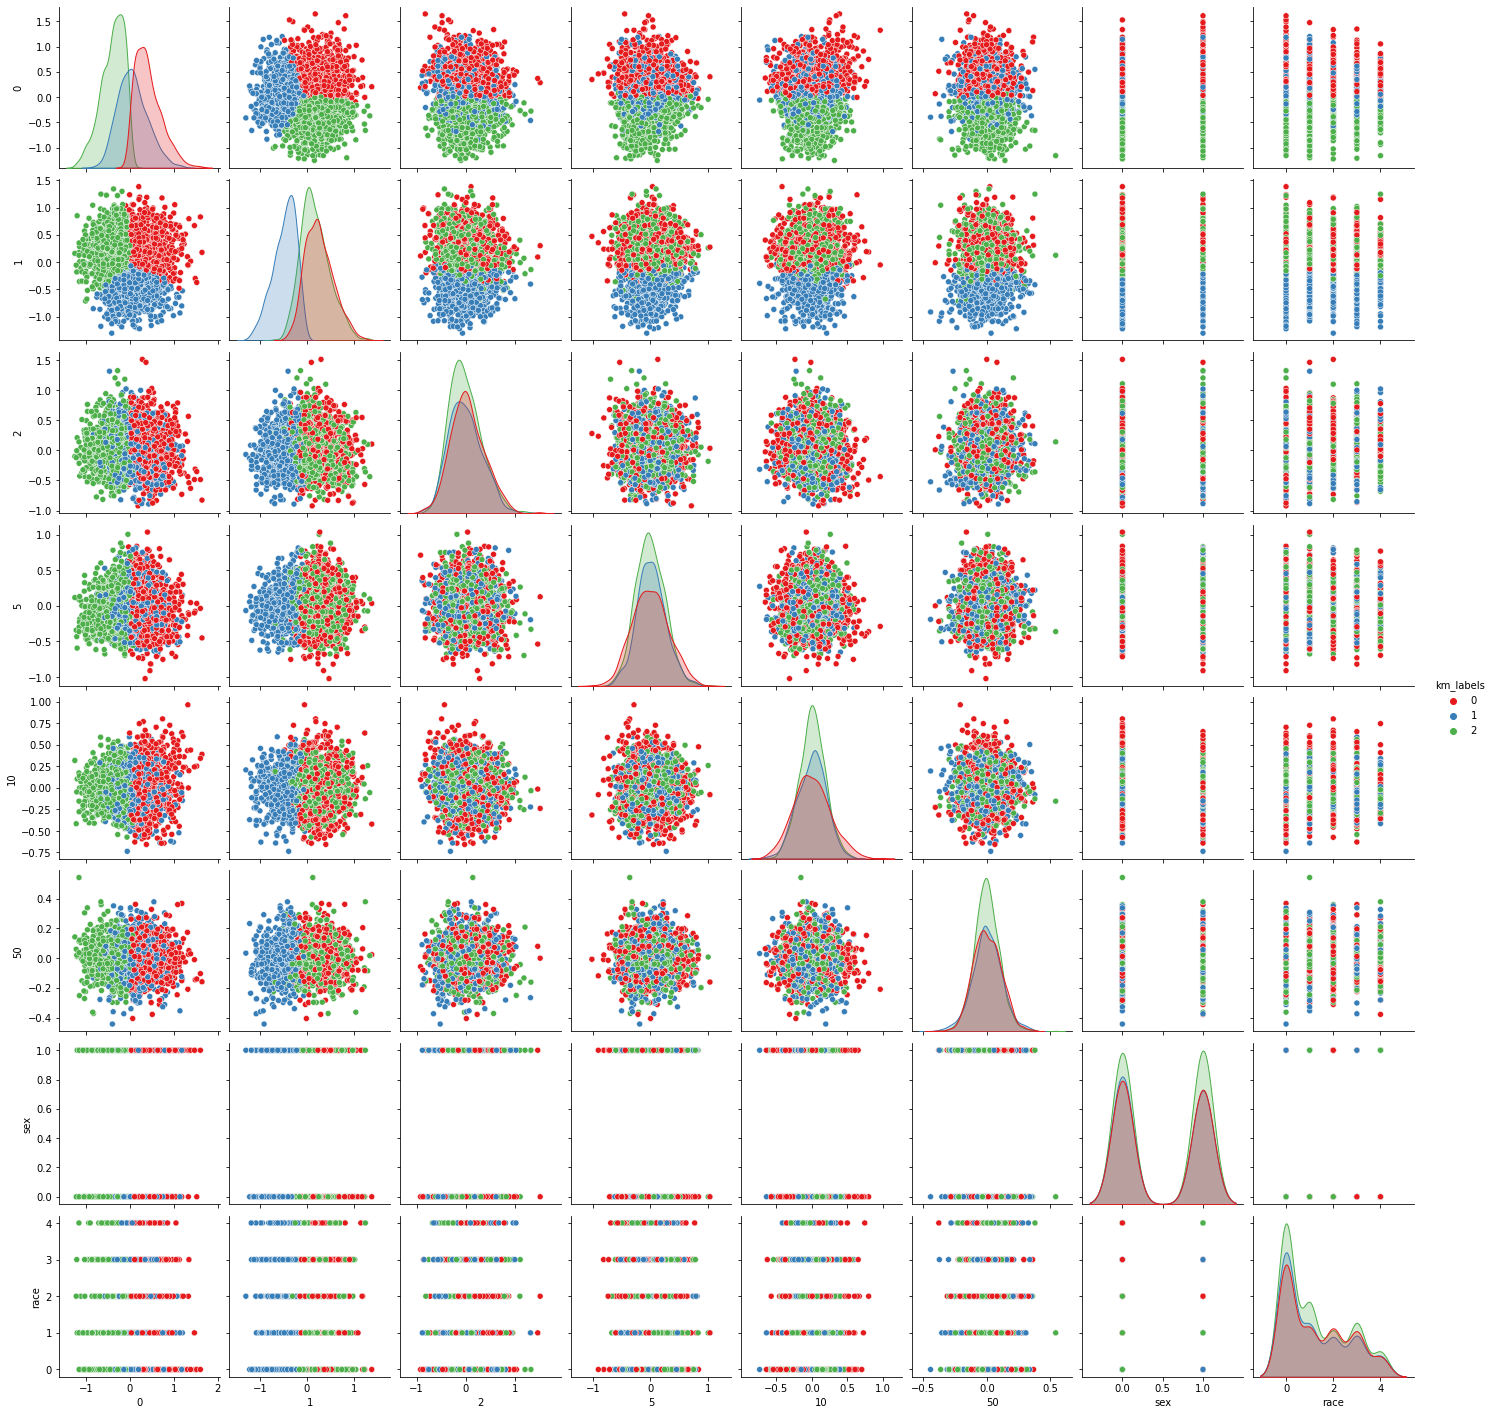

In [10]:
sns.pairplot(pca_faces_km[[0, 1, 2, 5, 10, 50, "sex", "race", "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [28]:
reload(common)
em_n = pca_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(pca_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.04961425495170234 time taken: 0.6888139247894287s
For n_clusters = 3 average silhouette_score: 0.03962109036656849 time taken: 0.8659570217132568s
For n_clusters = 4 average silhouette_score: 0.025722373023401097 time taken: 0.836967945098877s
For n_clusters = 5 average silhouette_score: 0.004992184843508152 time taken: 1.3612568378448486s
For n_clusters = 6 average silhouette_score: 0.008722430230711925 time taken: 1.1654605865478516s
For n_clusters = 7 average silhouette_score: 0.011253277851638582 time taken: 1.5290164947509766s
For n_clusters = 8 average silhouette_score: 0.008344251692761104 time taken: 1.3265380859375s
For n_clusters = 9 average silhouette_score: 0.010725434986873873 time taken: 1.2494535446166992s
For n_clusters = 10 average silhouette_score: 0.01721924710376895 time taken: 1.3848481178283691s
For n_clusters = 11 average silhouette_score: 0.014610870982760576 time taken: 1.1890203952789307s
For n_clusters = 12 avera

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


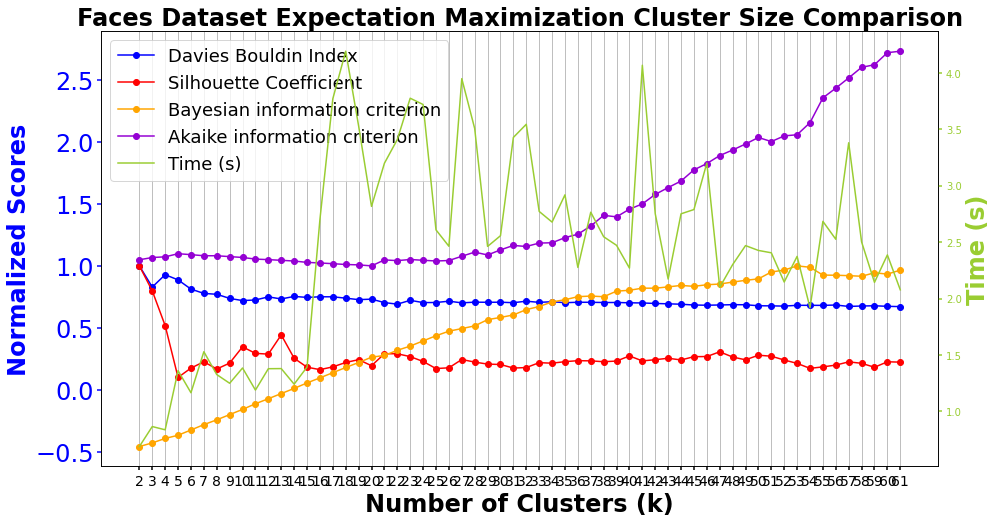

In [29]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


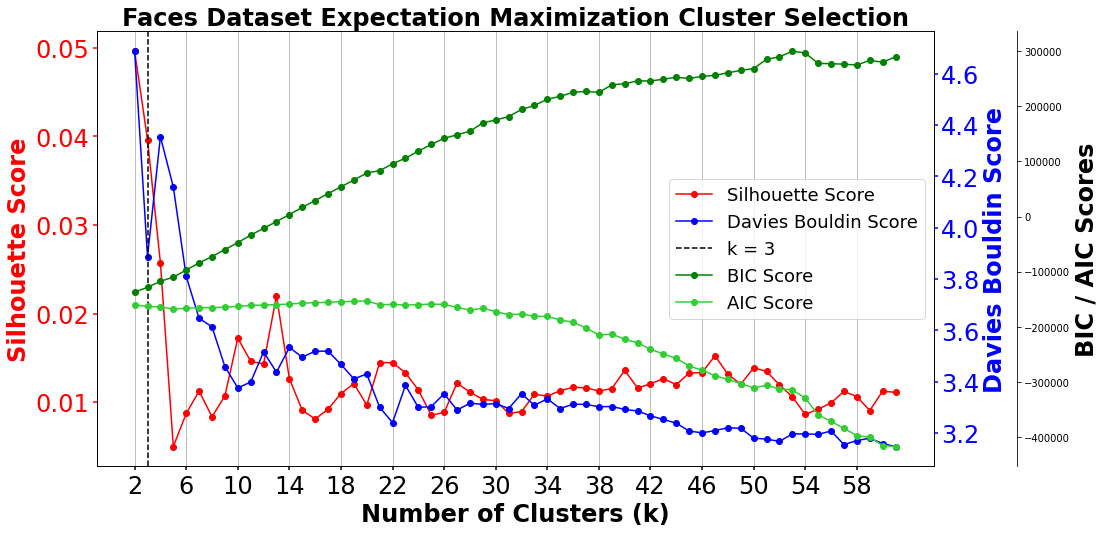

In [36]:
reload(common)
best_k = 3
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=4)

For n_clusters = 3 average silhouette_score: 0.03962109036656849 time taken: 0.6643025875091553s


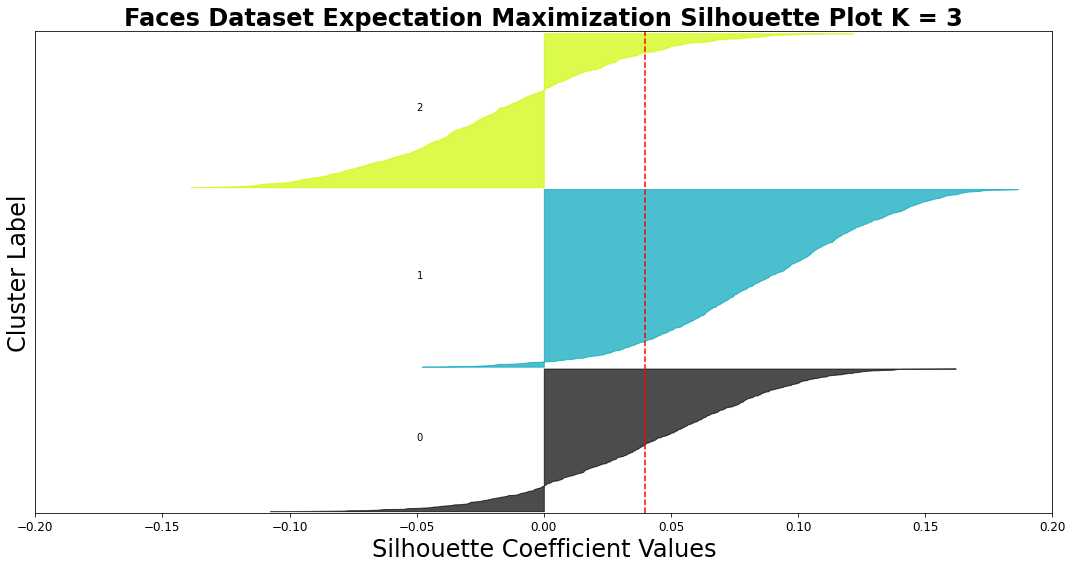

In [37]:
reload(common)
best_k=3
common.plot_silhouette_em(pca_faces, best_k, DATASET, xlim=[-0.2, 0.2])

In [39]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(pca_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(pca_faces)
pca_faces_gm = pd.DataFrame(pca_faces.copy())
pca_faces_gm['em_labels'] = em_model.predict(pca_faces)
pca_faces_gm['sex'] = y_train_faces['sex']
pca_faces_gm['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(pca_faces, em_model.predict(pca_faces))))

time taken 0.7699902057647705 s
homogeneity_score sex:  0.00037085731715939184
homogeneity_score race:  0.0010158123025557552
Silhouette Score: 0.04291638764007232


In [33]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

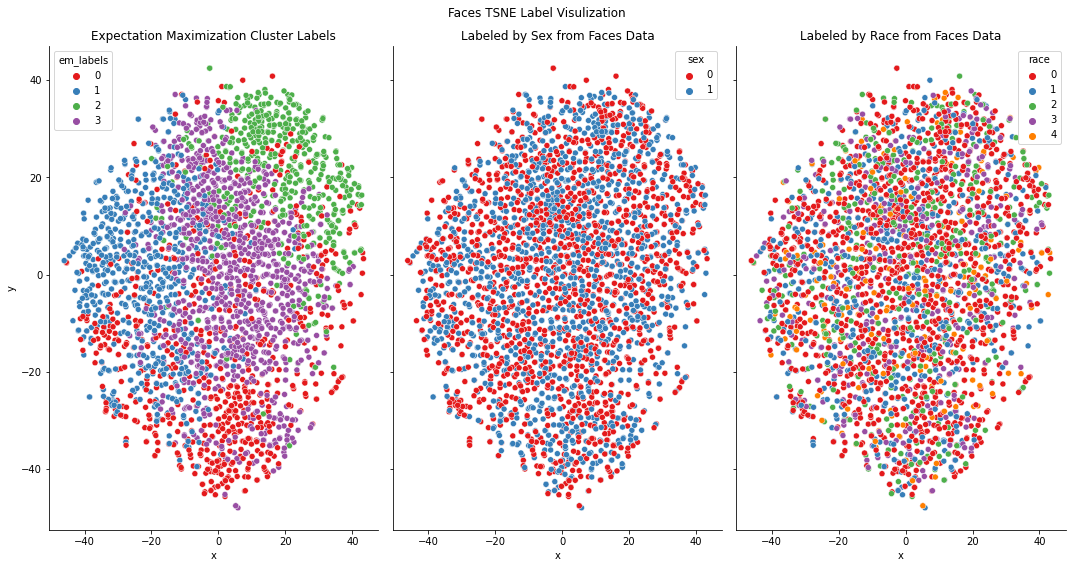

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

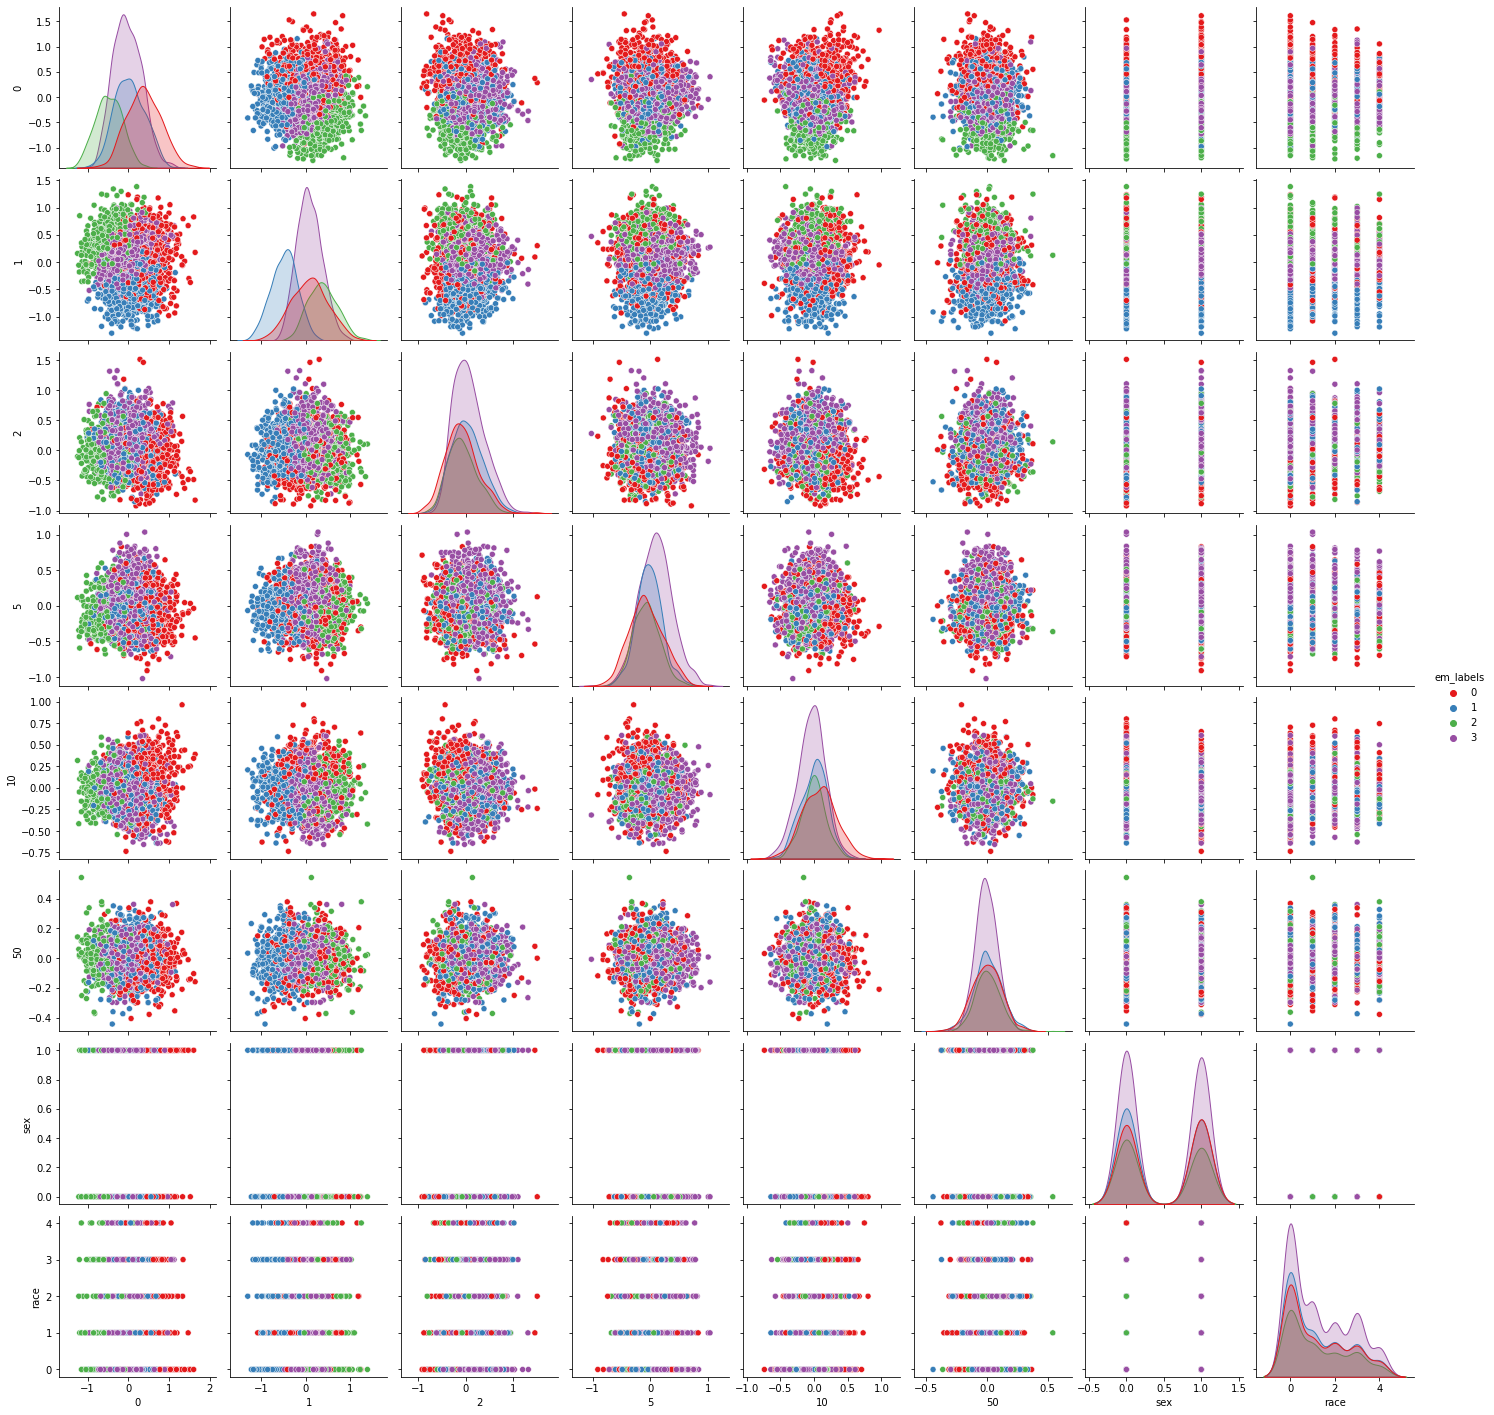

In [35]:
sns.pairplot(pca_faces_gm[[0, 1, 2, 5, 10, 50, "sex", "race", "em_labels"]], hue="em_labels", palette="Set1")